# <span style="background-color: lightgreen">Restaurant rating prediction using zomato data

# <span style="background-color: yellow"> Data source and description</span>
- ### <font color='008ae6'>Dataset link:</font> (kaggle): https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants
- ### <font color='008ae6'>url :</font> URL of the restaurant on zomato website
- ### <font color='008ae6'>address :</font> Address of restaurant in bangalore
- ### <font color='008ae6'>name :</font> name of the restaurant
- ### <font color='008ae6'>online_order :</font> Whether the restaurant has online ordering
- ### <font color='008ae6'>book_table :</font> Whether restaurant offers online table booking 
- ### <font color='008ae6'>rate :</font> Rating of restaurant on Zomato (target variable)
- ### <font color='008ae6'>votes :</font> Number of user votes the restaurant has
- ### <font color='008ae6'>phone :</font> phone number of the restaurant
- ### <font color='008ae6'>localtion :</font> neighbourhood in which the restaurant is located in 
- ### <font color='008ae6'>rest_type :</font> Different restaurant types
- ### <font color='008ae6'>dish_liked :</font> Dishes people liked at the restaurant
- ### <font color='008ae6'>cuisines :</font> cuisines offered by the restaurant
- ### <font color='008ae6'>avg_cost (cost for two people) :</font> average cost for two people
- ### <font color='008ae6'>review_list :</font> Restaurant review on Zomato
- ### <font color='008ae6'>menu_item :</font> Items in the menu of the restaurant
- ### <font color='008ae6'>listed_in(type) :</font> type of restaurant
- ### <font color='008ae6'>listed_in(city) :</font> localities in bangalore

# <span style="background-color: yellow">Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

In [53]:
# Load the dataset
df = pd.read_csv('zomato.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Let's now check the shape of the dataset

In [55]:
df.shape

(51717, 17)

# Let's now check for null values

In [56]:
df.isna().sum() 

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# <span style="background-color: yellow">Data preprocessing

In [57]:
df_clean = df.drop(['url', 'address','phone', 'menu_item'], axis=1)

In [58]:
df_clean=df_clean.dropna()
df_clean=df_clean.reset_index(drop=True)

In [59]:
df_clean.isna().sum() 

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [60]:
df_clean.shape

(23406, 13)

# Let's now look at the dataset

In [61]:
df_clean.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [62]:
df_clean.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [63]:
#Changing the column names
df_clean=df_clean.rename(columns={'approx_cost(for two people)':'avg_cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [64]:
df_clean.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [65]:
df_clean.shape

(23406, 13)

# <span style="background-color: yellow">Data insights (EDA)

<AxesSubplot:>

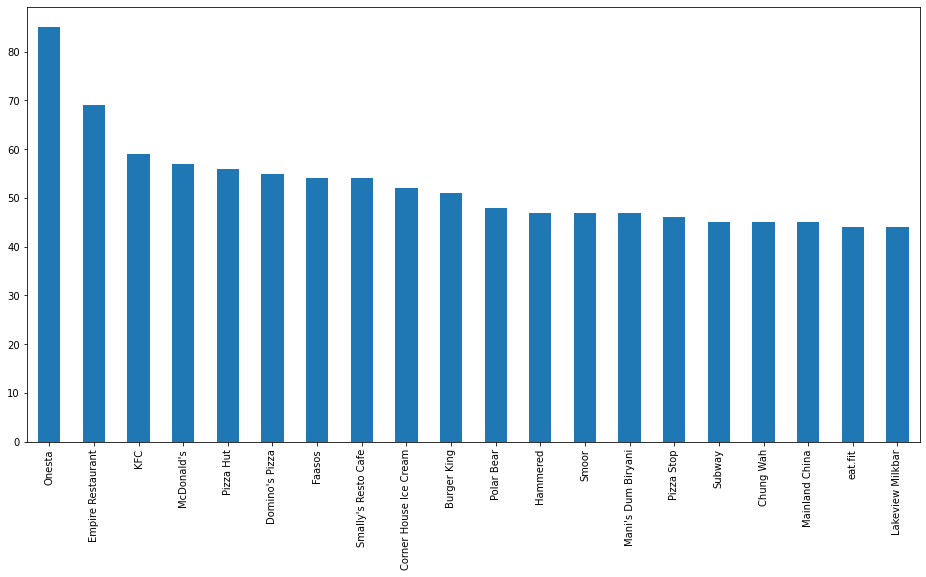

In [66]:
df_clean.name.value_counts()[:20].plot(kind='bar',figsize=(16,8))

### <span style="background-color: yellow">Interpretation:</span> From the above chart, we can see that there are multiple chains of restaurants in the dataset

<AxesSubplot:>

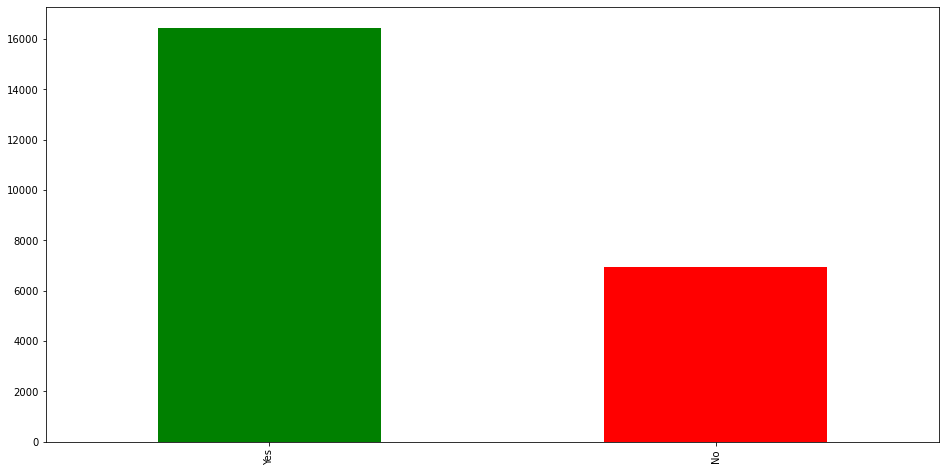

In [67]:
colors=['green','red']
df_clean.online_order.value_counts()[:20].plot(kind='bar',color=colors,figsize=(16,8))

### <span style="background-color: yellow">Interpretation:</span> From the above chart, we can see that majority of the hotels have online_order option, which is amazing considering the current situation. Lot of people prefer home delivery instead of dining at a restaurant.

<AxesSubplot:>

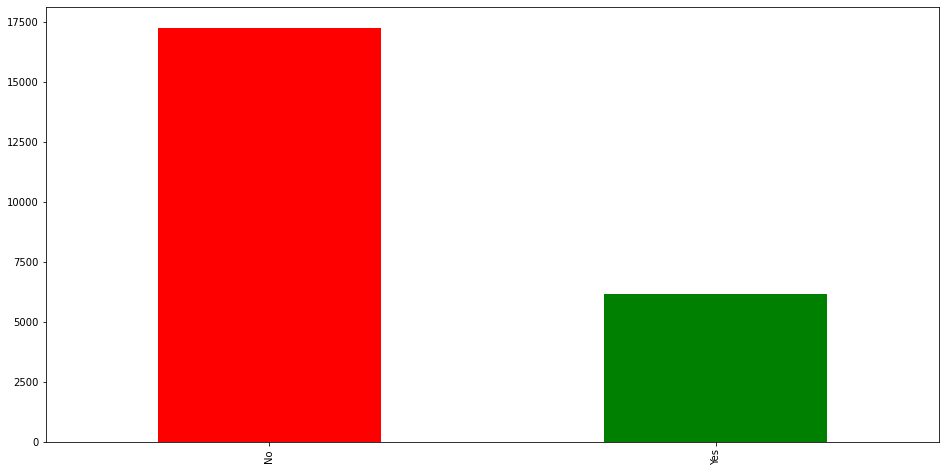

In [68]:
colors=['red','green']
df_clean.book_table.value_counts()[:20].plot(kind='bar',color=colors,figsize=(16,8))

### <span style="background-color: yellow">Interpretation:</span> From the above chart, we can see that majority of the hotels don't have the option to book a table

<AxesSubplot:>

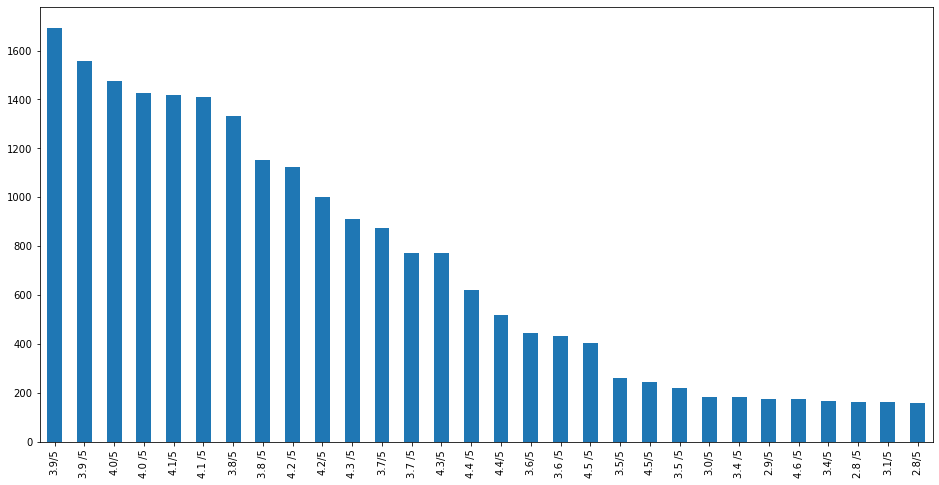

In [69]:
df_clean.rate.value_counts()[:30].plot(kind='bar',figsize=(16,8))

### <span style="background-color: yellow">Interpretation:</span> From the above chart, we can see that majority of the restaurants have a rating of 3.9 .

<AxesSubplot:>

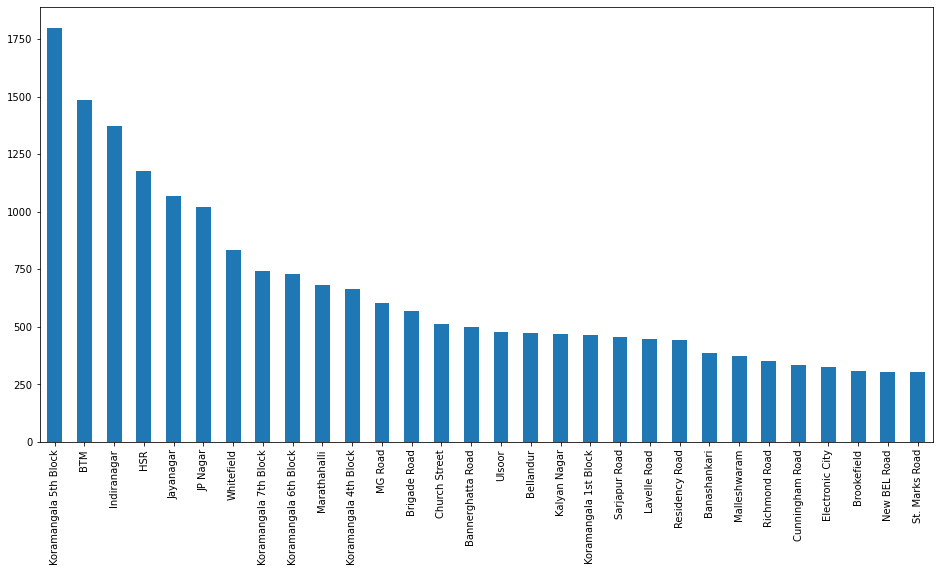

In [70]:
df_clean.location.value_counts()[:30].plot(kind='bar',figsize=(16,8))

### <span style="background-color: yellow">Interpretation:</span> From the above chart, we can see the top 30 locations with restaurants. Koramangala, BTM and Indiranagar are the locations with highest concentration of restaurants.

<AxesSubplot:>

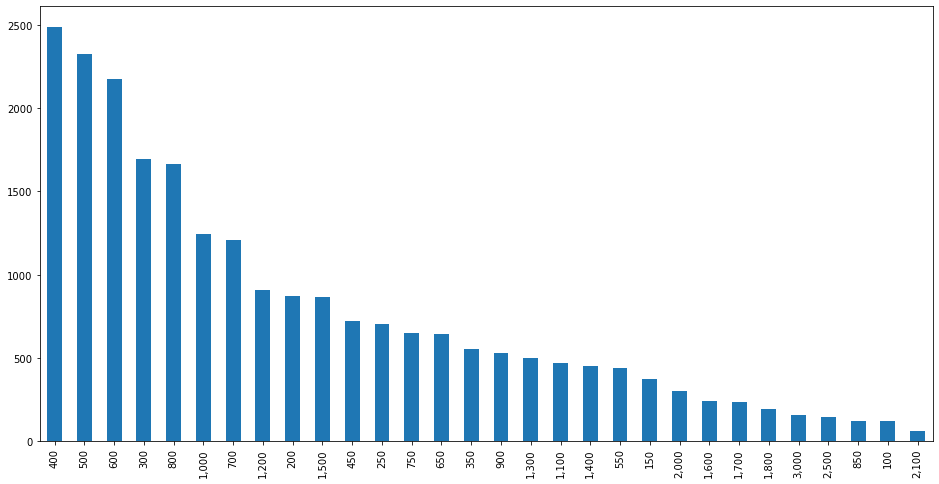

In [71]:
df_clean.avg_cost.value_counts()[:30].plot(kind='bar',figsize=(16,8))

### <span style="background-color: yellow">Interpretation:</span> Average cost for two people is 400INR.

# <font color='008ae6'>Most popular restaurant type

In [72]:
from collections import Counter
df_clean['temp_list'] = df_clean['rest_type'].apply(lambda x:str(x).split())
popresttype=Counter([item for sublist in df_clean['temp_list'] for item in sublist])

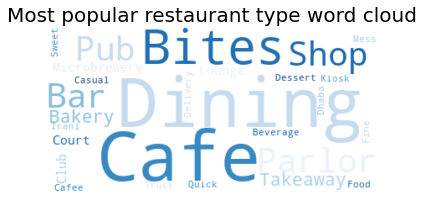

In [73]:
#Most popular restaurant type word cloud
wc = WordCloud(background_color="white",colormap="Blues")
clean_string = ','.join(popresttype)
wc.generate(clean_string)

plt.imshow(wc, interpolation='bilinear')
plt.title('Most popular restaurant type word cloud', size=20)
plt.axis("off")
#plt.gcf().set_size_inches(16, 7)
plt.show()

# <span style="background-color: yellow"> Most popular cuisine

In [74]:
import os
from wordcloud import WordCloud
from PIL import Image
d=os.getcwd()
mask = np.array(Image.open(d + '/chefthat2.jpg'))

In [75]:
from collections import Counter
df_clean['temp_list'] = df_clean['cuisines'].apply(lambda x:str(x).split())
popcuisine=Counter([item for sublist in df_clean['temp_list'] for item in sublist])

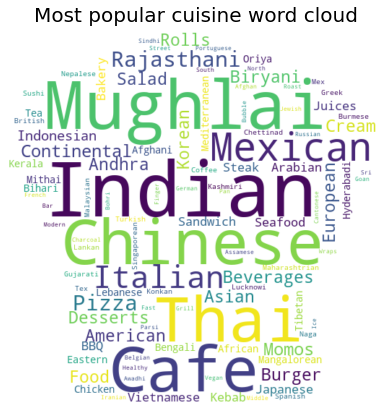

In [76]:
#Most popular cuisine word cloud
wc = WordCloud(background_color="white",mask=mask)
clean_string = ','.join(popcuisine)
wc.generate(clean_string)

plt.imshow(wc, interpolation='bilinear')
plt.title('Most popular cuisine word cloud', size=20)
plt.axis("off")
plt.gcf().set_size_inches(16, 7)
plt.show()

# <span style="background-color: yellow">Most liked casual dining dish

In [77]:
import os
from wordcloud import WordCloud
from PIL import Image
d=os.getcwd()
mask = np.array(Image.open(d + '/chefhat.jpg'))

In [78]:
from collections import Counter
mostlikedcasualdishes=df_clean[df_clean['rest_type'] == 'Casual Dining'] 
topcasualdishes= list(mostlikedcasualdishes['dish_liked'])
#topcas=Counter([item for sublist in topcasualdishes['temp_list'] for item in sublist])

clean_string =[]

for dish in topcasualdishes:
    if(type(dish) == str):
        temp = dish.split(',')
        for dishes in temp:
            dishes=" ".join(dishes.split())
            clean_string.append(dishes)
            
clean_string=str(clean_string)
clean_string

"['Pasta', 'Lunch Buffet', 'Masala Papad', 'Paneer Lajawab', 'Tomato Shorba', 'Dum Biryani', 'Sweet Corn Soup', 'Momos', 'Lunch Buffet', 'Chocolate Nirvana', 'Thai Green Curry', 'Paneer Tikka', 'Dum Biryani', 'Chicken Biryani', 'Panipuri', 'Gol Gappe', 'Onion Rings', 'Pasta', 'Kadhai Paneer', 'Salads', 'Salad', 'Roti', 'Jeera Rice', 'Noodles', 'Momos', 'Veg Manchow Soup', 'Kung Pao Chicken', 'Chicken Lollipop', 'Chop Suey', 'Dragon Chicken', 'Chicken Tikka Masala', 'Mutton Keema Dosa', 'Mutton Biryani', 'Raan Biryani', 'Brain Fry', 'Chicken Grill', 'Ghee Rice', 'Butter Chicken', 'Noodles', 'Thali', 'Biryani', 'Momos', 'Dragon Chicken', 'Hakka Noodles', 'Chowmein', 'Chop Suey', 'Chilli Garlic Noodles', 'Garlic Rice', 'Prawn Biryani', 'Dragon Chicken', 'Chicken Boneless Biryani', 'Afghani Biryani', 'Mughlai Biryani', 'Paneer Tikka Biryani', 'Gongura Biryani', 'Sushi', 'Noodles', 'Wine', 'Khau Suey', 'Mocktails', 'Yakisoba', 'Spring Roll', 'Pasta', 'Pepper Pizza', 'Paneer Pizza', 'Peppy P

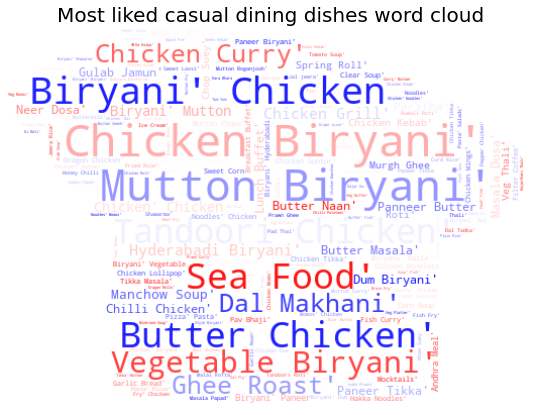

In [79]:
#Most liked casual dining dishes word cloud
wc = WordCloud(background_color="white",mask=mask,colormap="bwr")
wc.generate(clean_string)

plt.imshow(wc, interpolation='bilinear')
plt.title('Most liked casual dining dishes word cloud', size=20)
plt.axis("off")
plt.gcf().set_size_inches(16, 7)
plt.show()

### <span style="background-color: yellow">Interpretation:</span> From the above, chart we can see that majority of the most like casual dining dishes are non vegetarian.

# <span style="background-color: yellow">Top 10 location with Restaurants unique Restaurants

<AxesSubplot:xlabel='location'>

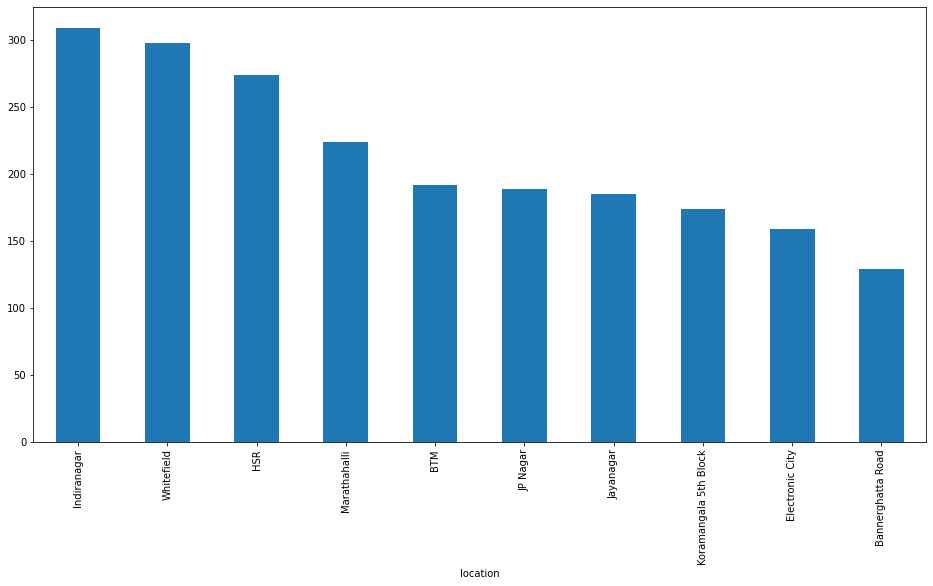

In [80]:
df_clean.groupby('location')['name'].nunique().sort_values(ascending=False)[:10,].plot(kind='bar',figsize=(16,8))

### <span style="background-color: yellow">Interpretation:</span> From the above chart, we can see the top 10 locations with highest number of unique restaurants

# Now, we will encode the string features and then apply various machine learning algorithms to <span style="background-color: yellow">predict rating (target varaiable)

In [81]:
df_clean = df_clean.drop(['temp_list'], axis=1)
df_clean=df_clean.dropna()
df_clean=df_clean.reset_index(drop=True)
df_clean

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",Pubs and bars,Whitefield
23402,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",Pubs and bars,Whitefield
23403,Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",Pubs and bars,Whitefield
23404,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield


In [82]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encode = df_clean.apply(le.fit_transform)
df_encode_copy=df_encode.copy()
df_encode.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,reviews_list,type,city
0,1341,1,1,45,747,1,20,3627,1393,53,6433,0,1
1,2515,1,0,45,758,1,20,2949,596,53,7740,0,1
2,2332,1,0,39,867,1,16,1409,485,53,2152,0,1
3,72,0,0,37,67,1,62,2751,1597,36,5253,0,1
4,1107,0,0,39,145,4,20,3434,1414,49,9872,0,1


### Now, we will perform scaling and then split

## <span style="background-color: yellow"> Scaling and splitting data

In [83]:
# We chose rating (rate) as our target variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x= df_encode.drop('rate',axis=1)
Y=df_encode[['rate']]

#scaling
sc = StandardScaler()
X = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 19)

# <span style="background-color: yellow">Logistic Regression

In [84]:
#fitting models and checking accuracies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=19)

lr.fit(X_train, y_train)

train_acc_lr=lr.score(X_train,y_train)*100
test_acc_lr=lr.score(X_test,y_test)*100
print ("Train accuracy ={:.2f}%".format(lr.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(lr.score(X_test,y_test)*100))

Train accuracy =19.72%
Test accuracy =18.34%


# <span style="background-color: yellow">Random Forest

In [85]:
#fitting models and checking accuracies
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=19)

In [86]:
rf.fit(X_train, y_train)

train_acc_rf=rf.score(X_train,y_train)*100
test_acc_rf=rf.score(X_test,y_test)*100
print ("Train accuracy ={:.2f}%".format(rf.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(rf.score(X_test,y_test)*100))

Train accuracy =100.00%
Test accuracy =82.57%


# <span style="background-color: yellow">XGBOOST

In [87]:
from xgboost import XGBClassifier
xg=XGBClassifier(random_state=19)

xg.fit(X_train, y_train)

train_acc_xg=xg.score(X_train,y_train)*100
test_acc_xg=xg.score(X_test,y_test)*100
print ("Train accuracy ={:.2f}%".format(xg.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(xg.score(X_test,y_test)*100))

Train accuracy =99.35%
Test accuracy =82.74%


# <span style="background-color: yellow">KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from math import *

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

train_acc_knn=knn.score(X_train,y_train)*100
test_acc_knn=knn.score(X_test,y_test)*100
print ("Train accuracy ={:.2f}%".format(knn.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(knn.score(X_test,y_test)*100))

Train accuracy =63.56%
Test accuracy =39.80%


#  <font color='#008ae6'>Evaluate the above models

# <span style="background-color: yellow">KNN evaluation

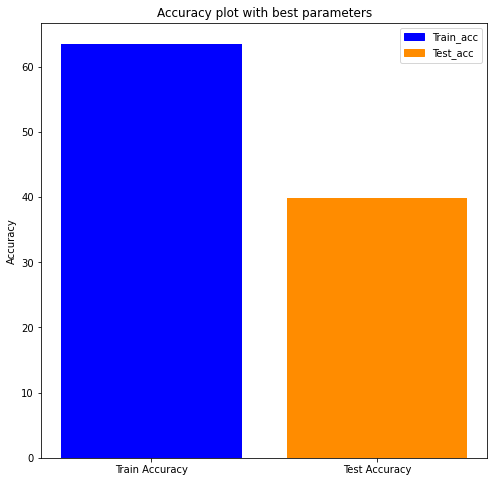

In [89]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_knn = [train_acc_knn,test_acc_knn]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_knn)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_knn)), data_knn,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [104]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, pred_knn_test, average="macro")*100))
f1_knn=f1_score(y_test, pred_knn_test, average="macro")*100
print("Precision score ={:.2f}%".format(precision_score(y_test, pred_knn_test, average="macro")*100))
precision_knn=precision_score(y_test, pred_knn_test, average="macro")*100
print("Recall score ={:.2f}%".format(recall_score(y_test, pred_knn_test, average="macro")*100))  
recall_knn=recall_score(y_test, pred_knn_test, average="macro")*100

F1 score =31.51%
Precision score =35.58%
Recall score =33.00%


In [91]:
# The classification report for the model:
pred_knn_test=knn.predict(X_test)
from sklearn.metrics import classification_report
print('-----CLASSIFICATION  REPORT IS------')
print(classification_report(y_test,pred_knn_test))  

-----CLASSIFICATION  REPORT IS------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.12      0.25      0.17         4
           8       0.23      0.38      0.29         8
           9       0.06      1.00      0.11         1
          10       0.07      0.33      0.12         3
          11       0.06      0.12      0.08         8
          12       0.25      0.30      0.27        10
          13       0.06      0.12      0.08         8
          14       0.18      0.44      0.26        16
          15       0.09      0.10      0.10        20
          16       0.32      0.60      0.42        20
          17       0.22      0.37      0.27 

# <span style="background-color: yellow">Logistic Regression evaluation

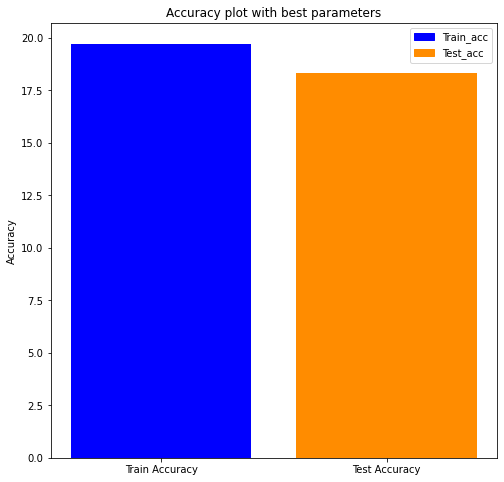

In [92]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_lr = [train_acc_lr,test_acc_lr]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_lr)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_lr)), data_lr,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [105]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, pred_lr_test, average="macro")*100))
f1_lr=f1_score(y_test, pred_lr_test, average="macro")*100
print("Precision score ={:.2f}%".format(precision_score(y_test, pred_lr_test, average="macro")*100))
precision_lr=precision_score(y_test, pred_lr_test, average="macro")*100
print("Recall score ={:.2f}%".format(recall_score(y_test, pred_lr_test, average="macro")*100))  
recall_lr=recall_score(y_test, pred_lr_test, average="macro")*100

F1 score =7.90%
Precision score =9.22%
Recall score =8.58%


In [94]:
# The classification report for the model:
pred_lr_test=lr.predict(X_test)
from sklearn.metrics import classification_report
print('-----CLASSIFICATION  REPORT IS------')
print(classification_report(y_test,pred_lr_test))  

-----CLASSIFICATION  REPORT IS------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        20
          16       0.00      0.00      0.00        20
          17       0.00      0.00      0.00        27
          18       0.17      0.03      0.04 

# <span style="background-color: yellow">Random Forest evaluation

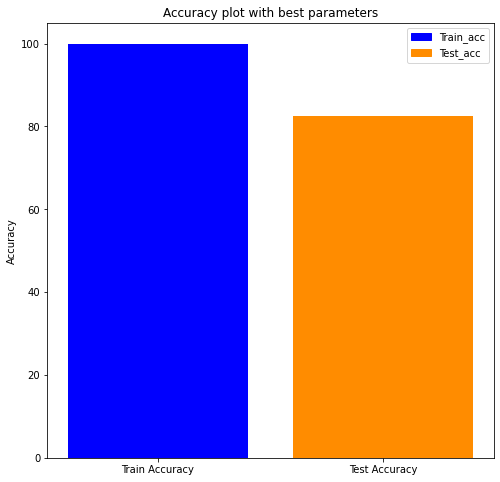

In [95]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_rf = [train_acc_rf,test_acc_rf]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_rf)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_rf)), data_rf,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [110]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, pred_rf_test, average="macro")*100))
f1_rf=f1_score(y_test, pred_rf_test, average="macro")*100
print("Precision score ={:.2f}%".format(precision_score(y_test, pred_rf_test, average="macro")*100))
precision_rf=precision_score(y_test, pred_rf_test, average="macro")*100
print("Recall score ={:.2f}%".format(recall_score(y_test, pred_rf_test, average="macro")*100))  
recall_rf=recall_score(y_test, pred_rf_test, average="macro")*100

F1 score =81.82%
Precision score =86.12%
Recall score =79.32%


In [97]:
# The classification report for the model:
pred_rf_test=rf.predict(X_test)
from sklearn.metrics import classification_report
print('-----CLASSIFICATION  REPORT IS------')
print(classification_report(y_test,pred_rf_test))  

-----CLASSIFICATION  REPORT IS------
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       1.00      0.75      0.86         4
           8       1.00      0.62      0.77         8
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       0.71      0.62      0.67         8
          12       1.00      0.40      0.57        10
          13       0.86      0.75      0.80         8
          14       0.93      0.88      0.90        16
          15       0.81      0.65      0.72        20
          16       0.89      0.80      0.84        20
          17       0.92      0.89      0.91        27
          18       0.83      0.62      0.71        40
          19       0.79      0.70      0.74 

# <span style="background-color: yellow">XGBoost evaluation

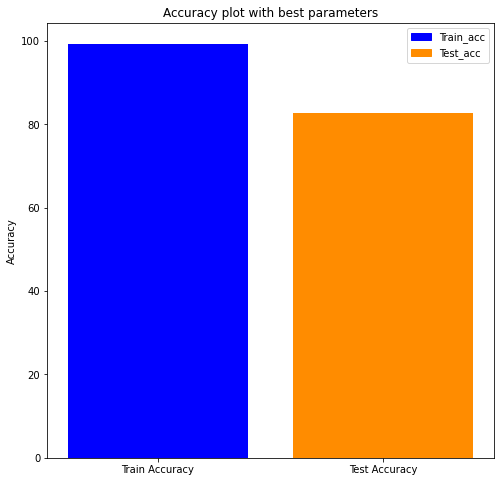

In [98]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_xg = [train_acc_xg,test_acc_xg]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_xg)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_xg)), data_xg,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [109]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, pred_xg_test, average="macro")*100))
f1_xg=f1_score(y_test, pred_xg_test, average="macro")*100
print("Precision score ={:.2f}%".format(precision_score(y_test, pred_xg_test, average="macro")*100))
precision_xg=precision_score(y_test, pred_xg_test, average="macro")*100
print("Recall score ={:.2f}%".format(recall_score(y_test, pred_xg_test, average="macro")*100))  
recall_xg=recall_score(y_test, pred_rf_test, average="macro")*100

F1 score =81.58%
Precision score =85.89%
Recall score =78.94%


In [100]:
# The classification report for the model:
pred_xg_test=xg.predict(X_test)
from sklearn.metrics import classification_report
print('-----CLASSIFICATION  REPORT IS------')
print(classification_report(y_test,pred_xg_test))  

-----CLASSIFICATION  REPORT IS------
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       1.00      0.75      0.86         4
           8       1.00      0.62      0.77         8
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      0.62      0.77         8
          12       0.80      0.40      0.53        10
          13       0.86      0.75      0.80         8
          14       1.00      0.75      0.86        16
          15       0.93      0.65      0.76        20
          16       0.67      0.70      0.68        20
          17       0.88      0.85      0.87        27
          18       0.93      0.68      0.78        40
          19       0.84      0.72      0.77 

# <span style="background-color: yellow">Comparing accuracies of all the algorithms

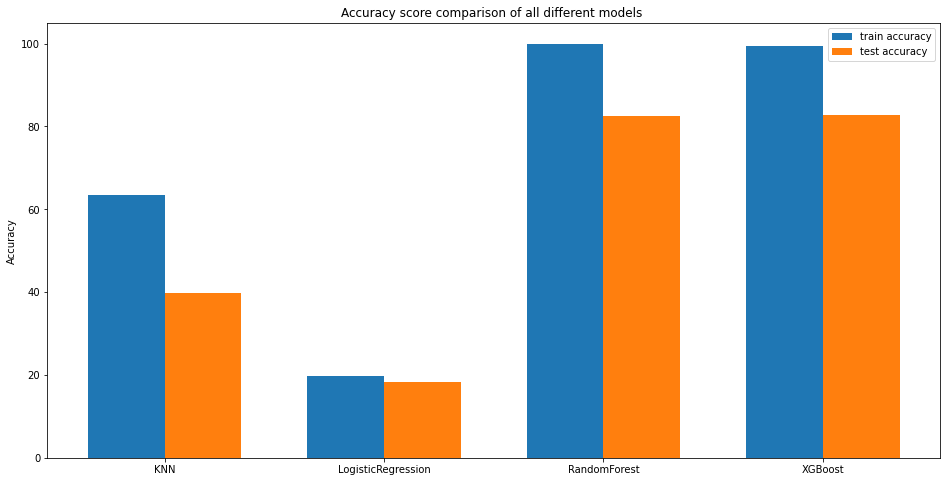

In [101]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# set width of bar
#barWidth = 0.25

train_accuracies = [train_acc_knn,train_acc_lr,train_acc_rf,train_acc_xg]
test_accuracies  = [test_acc_knn,test_acc_lr,test_acc_rf,test_acc_xg]

labels = ['KNN', 'LogisticRegression', 'RandomForest','XGBoost']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rec1 = ax.bar(x - width/2, train_accuracies, width, label='train accuracy')
rec2 = ax.bar(x + width/2, test_accuracies, width, label='test accuracy')


ax.set_ylabel('Accuracy')
ax.set_title('Accuracy score comparison of all different models ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')

plt.gcf().set_size_inches(16, 8)
plt.show()

# <span style="background-color: yellow">Comparing the accuracy, F1, precison and recall scores of the two best performing algorithms (Random Forest and XGBoost)

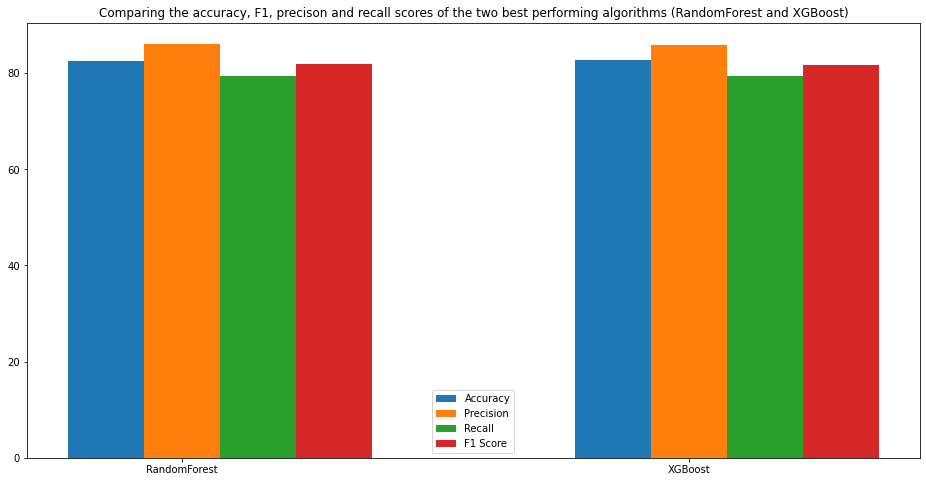

In [111]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# set width of bar
#barWidth = 0.25

test_accuracies  = [test_acc_rf,test_acc_xg]
precision_scores = [precision_rf,precision_xg]
recall_scores = [recall_rf,recall_xg]
f1_scores = [f1_rf,f1_xg]

labels = ['RandomForest','XGBoost']
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rec1 = ax.bar(x , test_accuracies, width, label='Accuracy')
rec2 = ax.bar(x + width, precision_scores, width, label='Precision')
rec3 = ax.bar(x + width*2, recall_scores, width, label='Recall')
rec4 = ax.bar(x + width*3, f1_scores, width, label='F1 Score')


ax.set_title('Comparing the accuracy, F1, precison and recall scores of the two best performing algorithms (RandomForest and XGBoost)')
ax.set_xticks(x+width)
ax.set_xticklabels(labels)
ax.legend(loc='best')

plt.gcf().set_size_inches(16, 8)
plt.show()

# <font color='008ae6'>Conclusion:</font> 
- ### XGboost has yeilded the best test accuracy at 82.74% and RandomForest performed just as good as XGBoost with 82.57% test accuracy.
- ### <font color='008ae6'>Quick Bytes</font> is the top restaurant type.
- ### <font color='008ae6'>Cafe Coffee day</font> has the highest number of franchises.
- ### Majority of restaurants are <font color='008ae6'>accepting online orders.</font>
- ### Most of the restaurants<font color='008ae6'> do not have online table booking facility</font>.
- ### <font color='008ae6'> BTM and Koramangala</font> has the highest concentration of restaurants.
- ### Average cost for two people is <font color='008ae6'>400INR</font>.
- ### Most like casual dining dish is <font color='008ae6'>Biryani chicken</font>.
- ### Most of the popular dishes are <font color='008ae6'>all non vegetarian</font>.
- ### <font color='008ae6'>Indian, Mughalai and thai</font> are the most popular cuisines.

#  <font color='008ae6'>From a marketing perspective to start a successful restaurant</font> we can do the following based on the above analysis:

- ### <font color='008ae6'>BTM, koramangala and Indiranagar</font> are good places to start a new restaurant because of a high concentration of restaurants it must be popular among foodies and it will be cheaper to operate in these areas.
- ### <font color='008ae6'>Offering online order could affect overall rating.</font>
- ### It is <font color='008ae6'>important</font> to have all or atleast one of the following cuisines <font color='008ae6'>Indian, mughalai and thai.</font>
- ### It is better to have an average cost for two people <font color='008ae6'>under 500INR</font> in the beginning.
- ### Having  <font color='008ae6'>fast food</font> could boost the rating of the restaurant.